In [60]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import numpy as np
import seaborn as sb

📝부동산 시장 분석 프로젝트

In [61]:
boston = load_data('boston')
boston

[data] https://data.hossam.kr/data/kaggle/boston.xlsx
[desc] 보스턴 인근 지역의 인구·환경·교육·범죄·세금 정보 등을 기반으로 주택의 중위가격(MEDV)을 예측하기 위해 수집된 대표적인 회귀 분석용 주택시장 데이터 (출처: https://www.kaggle.com/datasets/altavish/boston-housing-dataset)

field    description
-------  ---------------------------------------------------------------------------------------
CRIM     타운별 1인당 범죄율 (Per capita crime rate by town)
ZN       25,000 sqft 이상 주거용 대지 비율 (Proportion of residential land zoned for large lots)
INDUS    비소매 상업구역 비율 (Proportion of non-retail business acres per town)
CHAS     찰스강 인접 여부 (Charles River dummy variable: 1 if tract bounds river; 0 otherwise)
NOX      대기 오염 정도 (Nitric oxides concentration, parts per 10 million)
RM       주택당 평균 방(Room) 수 (Average number of rooms per dwelling)
AGE      1940년 이전 건축 비율 (Proportion of owner-occupied units built prior to 1940)
DIS      5개 주요 고용센터까지의 거리 (Weighted distances to five Boston employment centers)
RAD      고속도로 접근성 지수 (Index of accessibility to radial highways)
T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [62]:
# 1-1
shape = boston.shape
boston.info()
print(f"boston 데이터의 행의 개수는 {shape[0]}개, 열의 개수는 {shape[1]}개입니다")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
boston 데이터의 행의 개수는 506개, 열의 개수는 14개입니다


In [63]:
# 1-2
boston.CHAS.info()

<class 'pandas.core.series.Series'>
RangeIndex: 506 entries, 0 to 505
Series name: CHAS
Non-Null Count  Dtype
--------------  -----
506 non-null    int64
dtypes: int64(1)
memory usage: 4.1 KB


In [64]:
# 1-2
boston['CHAS'] = boston['CHAS'].astype('category')


In [65]:
boston['CHAS'].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [66]:
# 1-2 변환
boston['CHAS'] = boston['CHAS'].replace({0:'강 비인접', 1:'강 인접'}).astype('category')
boston

C:\Users\itwill\AppData\Local\Temp\ipykernel_26552\2749130832.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  boston['CHAS'] = boston['CHAS'].replace({0:'강 비인접', 1:'강 인접'}).astype('category')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,강 비인접,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,강 비인접,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,강 비인접,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,강 비인접,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,강 비인접,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,강 비인접,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,강 비인접,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,강 비인접,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,강 비인접,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [67]:
# 1-2
boston['CHAS'].value_counts()

CHAS
강 비인접    471
강 인접      35
Name: count, dtype: int64

In [68]:
# 1-3
boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

📝Mission2: 수치형 변수 기초통계량 분석

In [69]:
# 2-1
boston['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [70]:
# 2-1
boston['CRIM'].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

In [71]:
# 2-1
boston['RM'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

In [72]:
# 2-1
boston['LSTAT'].describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64

In [73]:
# 2-1
boston['NOX'].describe()

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: NOX, dtype: float64

In [74]:
my_dpi = 120
fpath = "./NotoSansKR-Regular.ttf"
fprop = fm.FontProperties(fname=fpath)
fname = fprop.get_name()


plt.rcParams['font.family'] = fname
plt.rcParams['font.size'] = 6
plt.rcParams['axes.unicode_minus'] = False

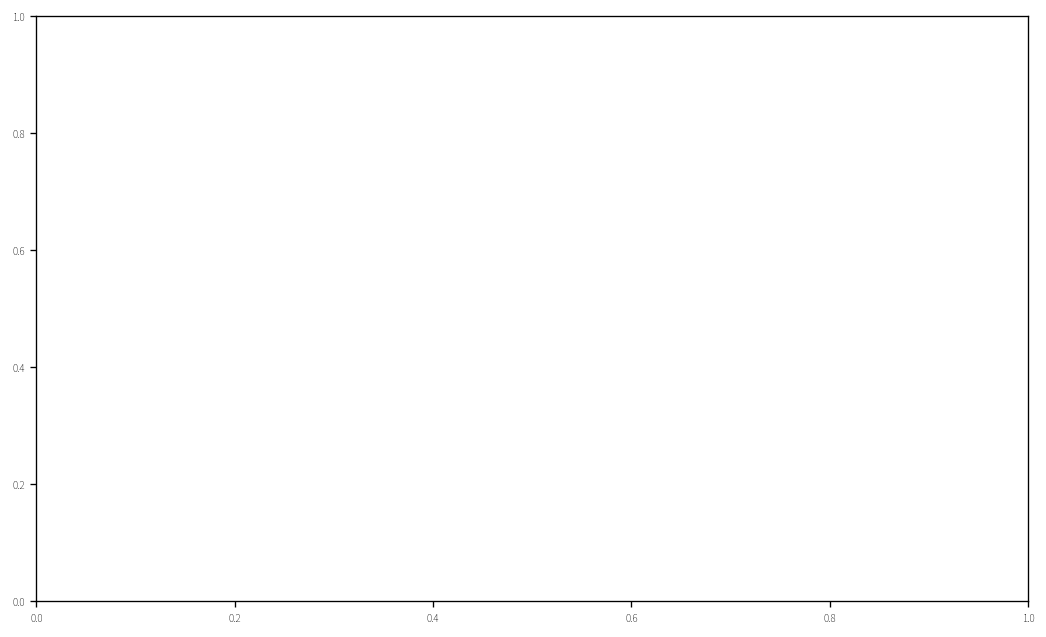

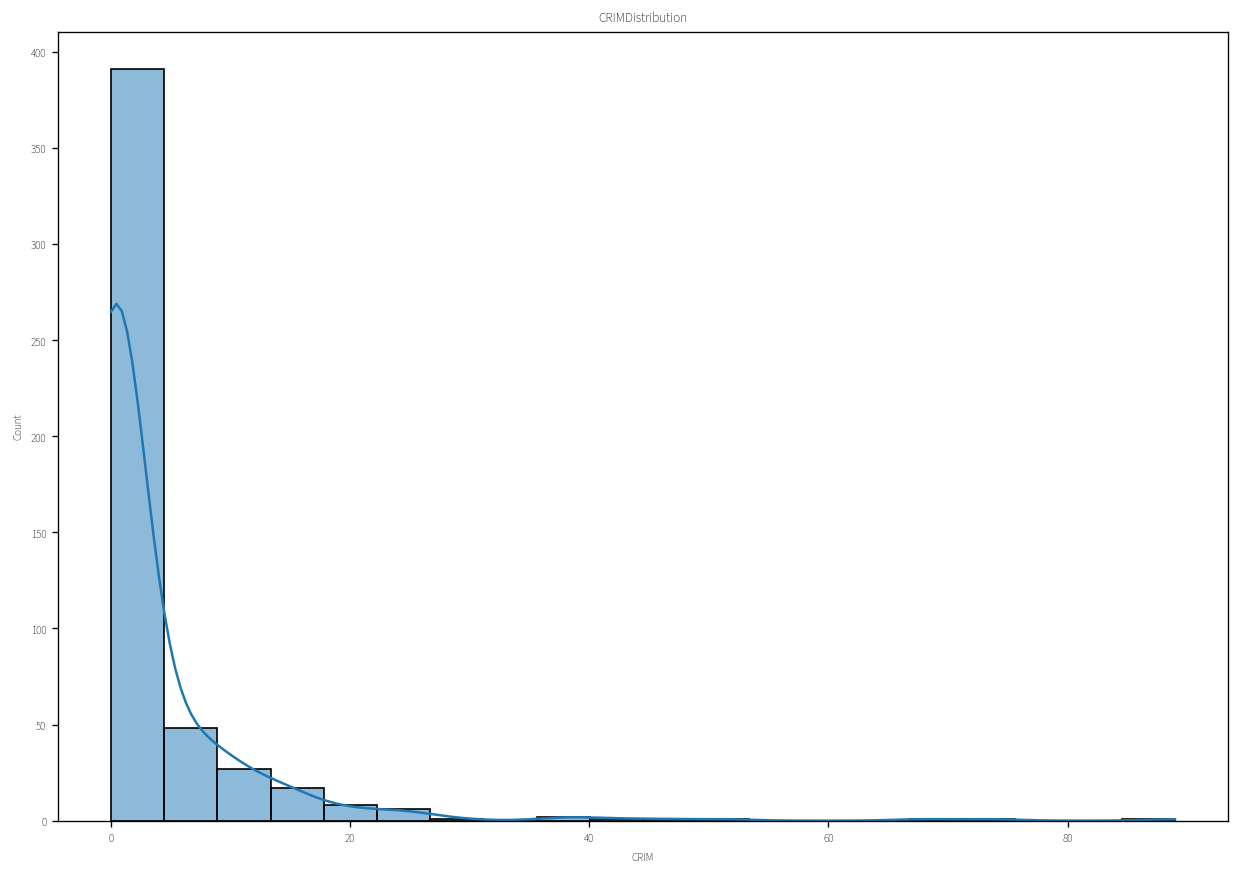

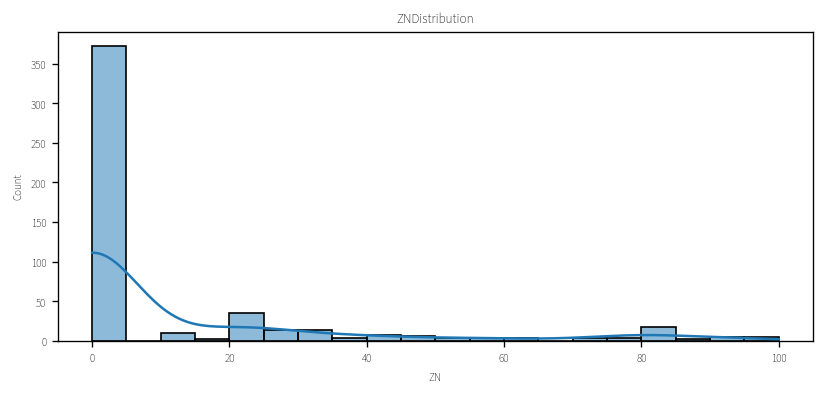

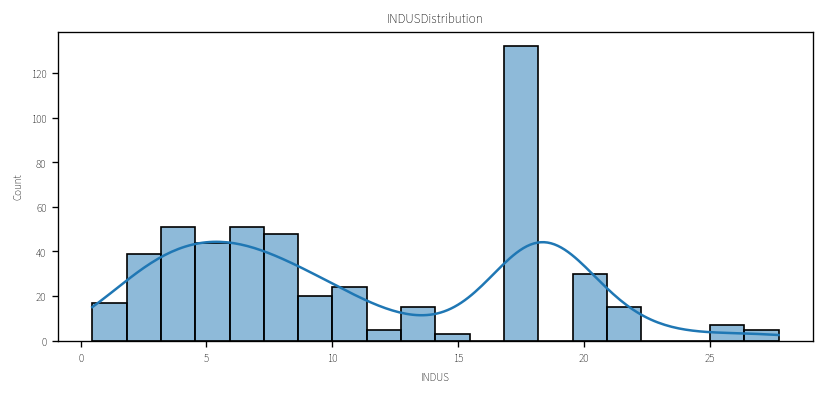

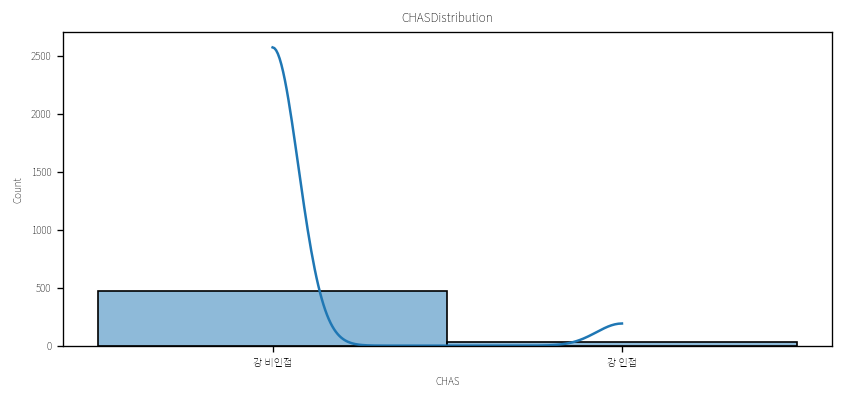

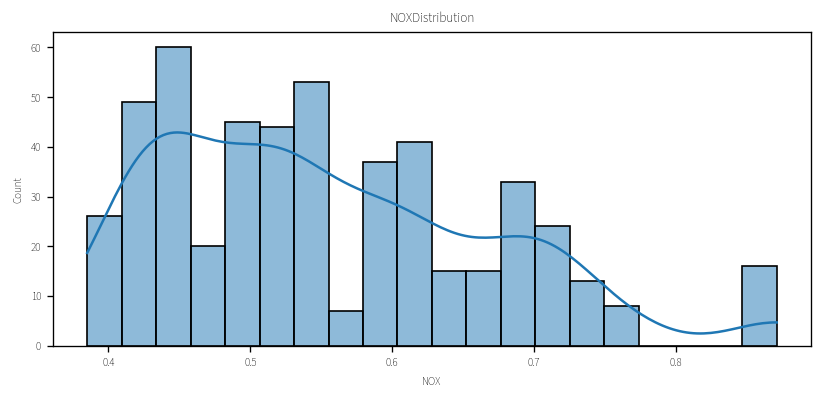

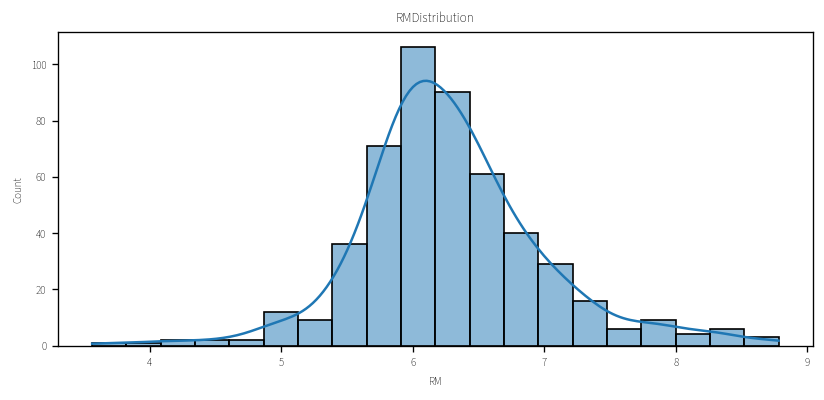

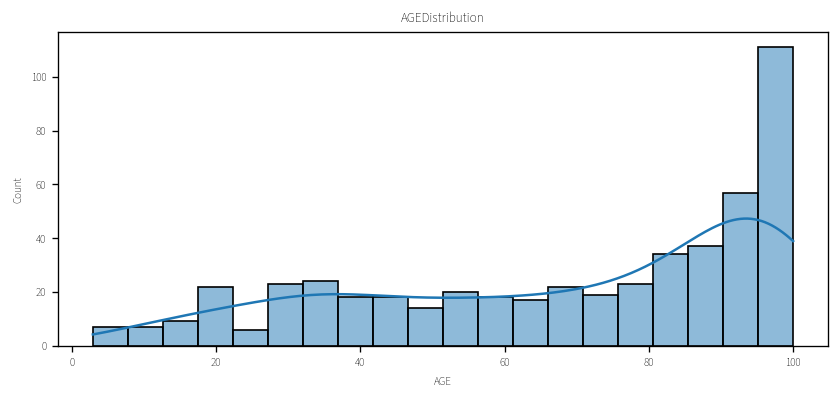

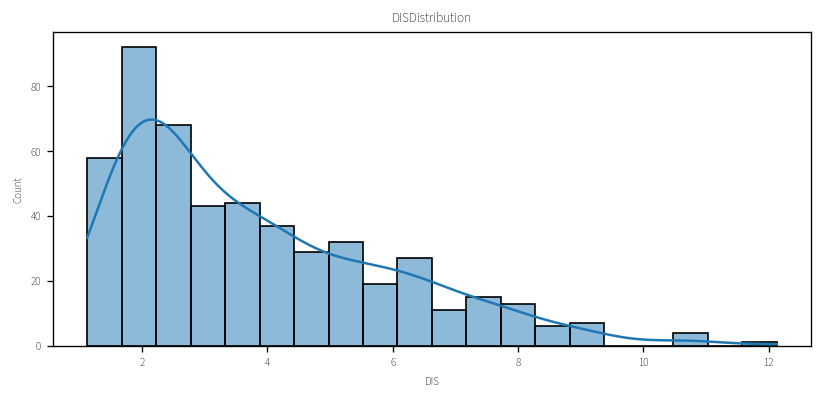

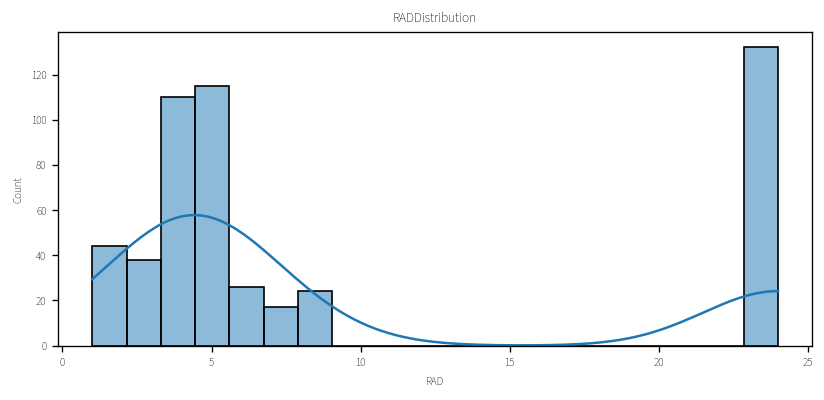

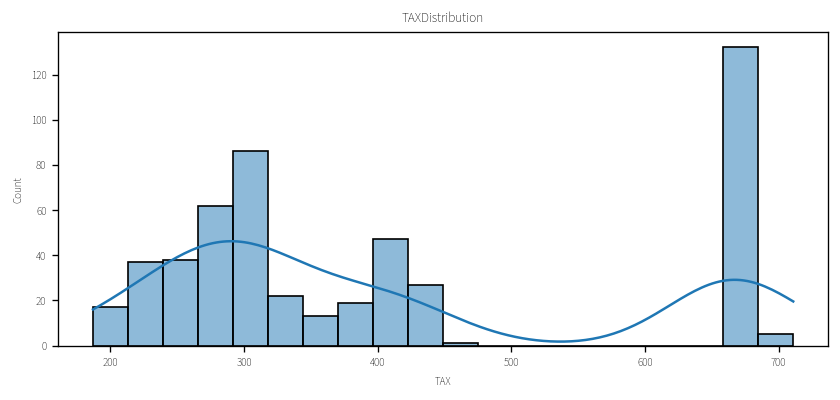

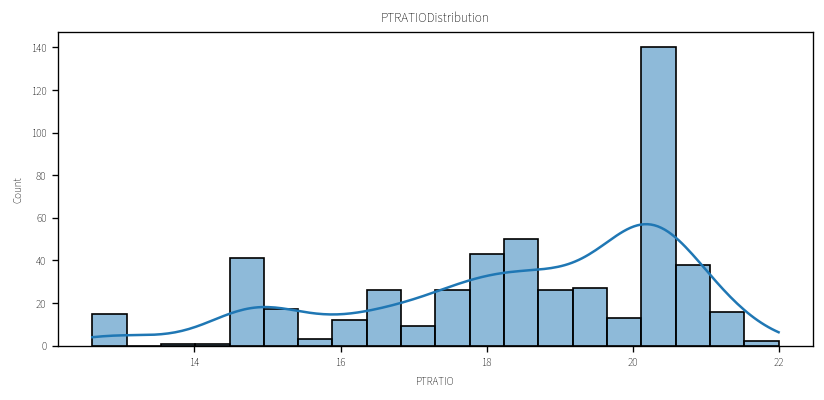

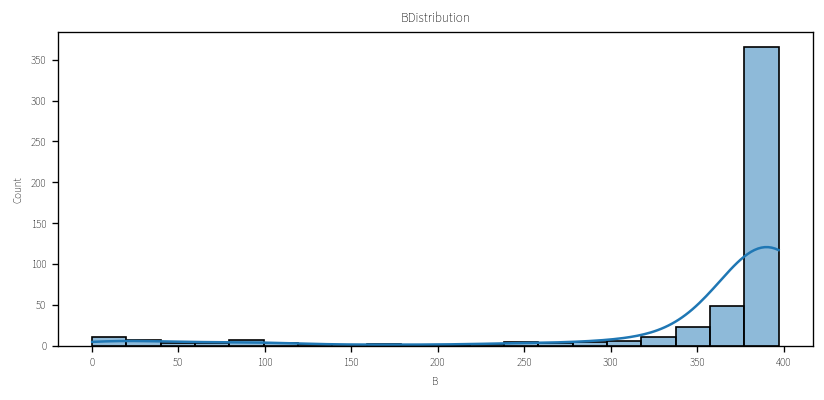

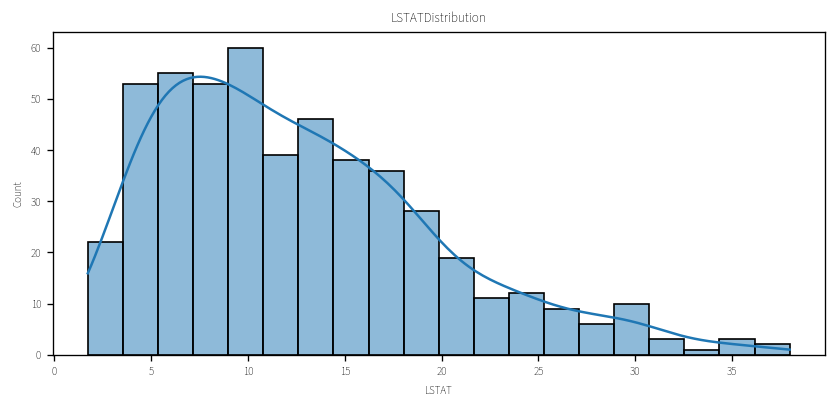

In [75]:
# 2-2
# 각 변수의 분포 형태 분석

width_px = 1280
height_px = 760
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)
features = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

plt.figure(figsize=(30,35))
for i, col in enumerate(features):
    plt.subplot(5,3, i+1)
    sb.histplot(boston[col], kde=True, bins=20)
    plt.title(f"{col}Distribution")
    plt.rcParams['figure.figsize'] = (20,15)
    plt.rcParams['figure.dpi'] = 120
    plt.tight_layout()
    plt.show()

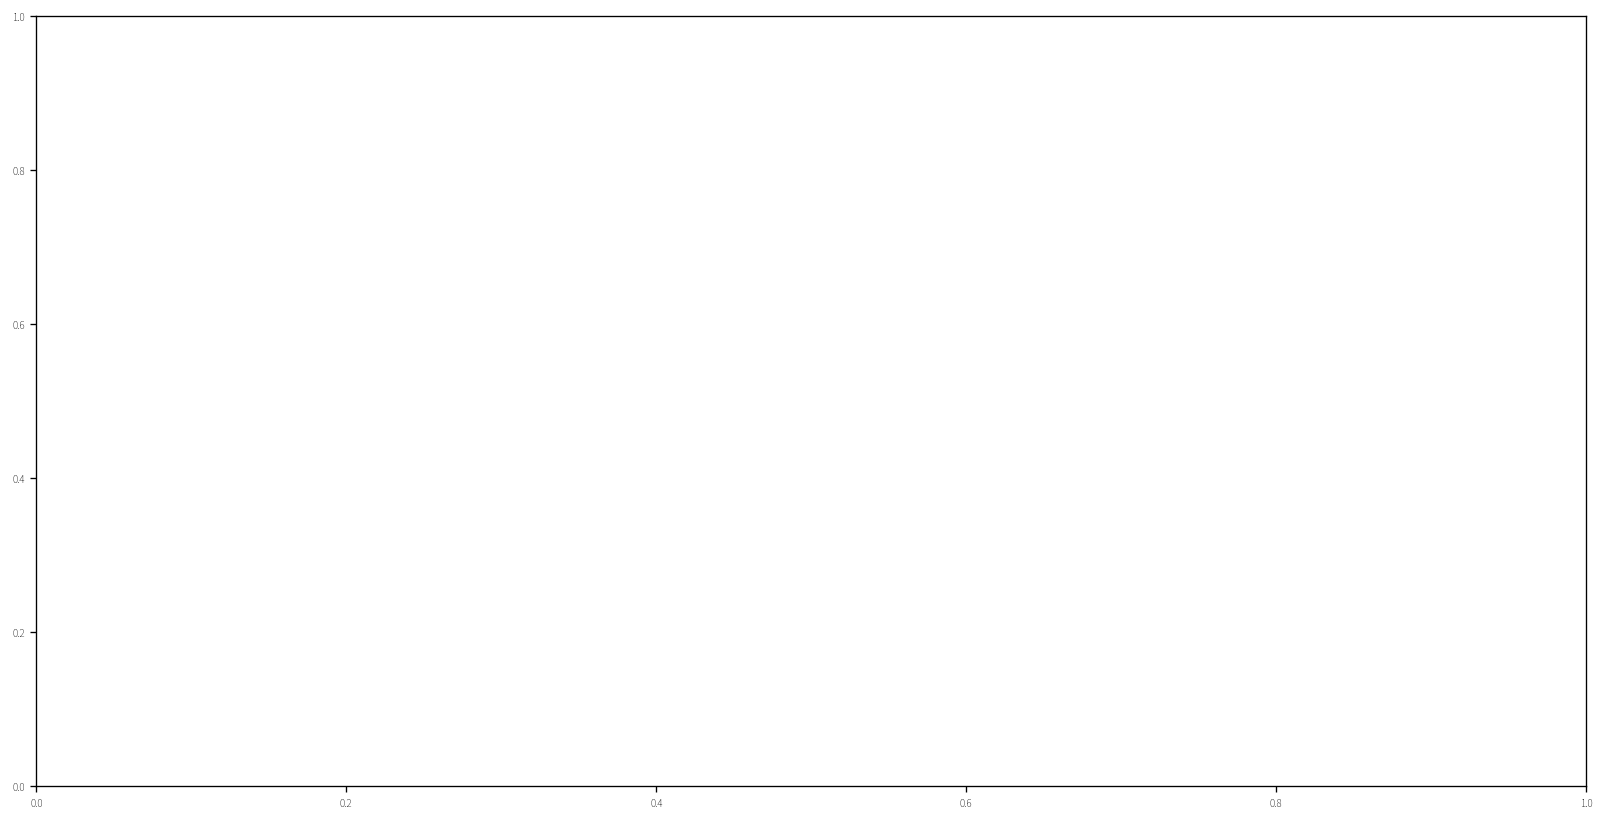

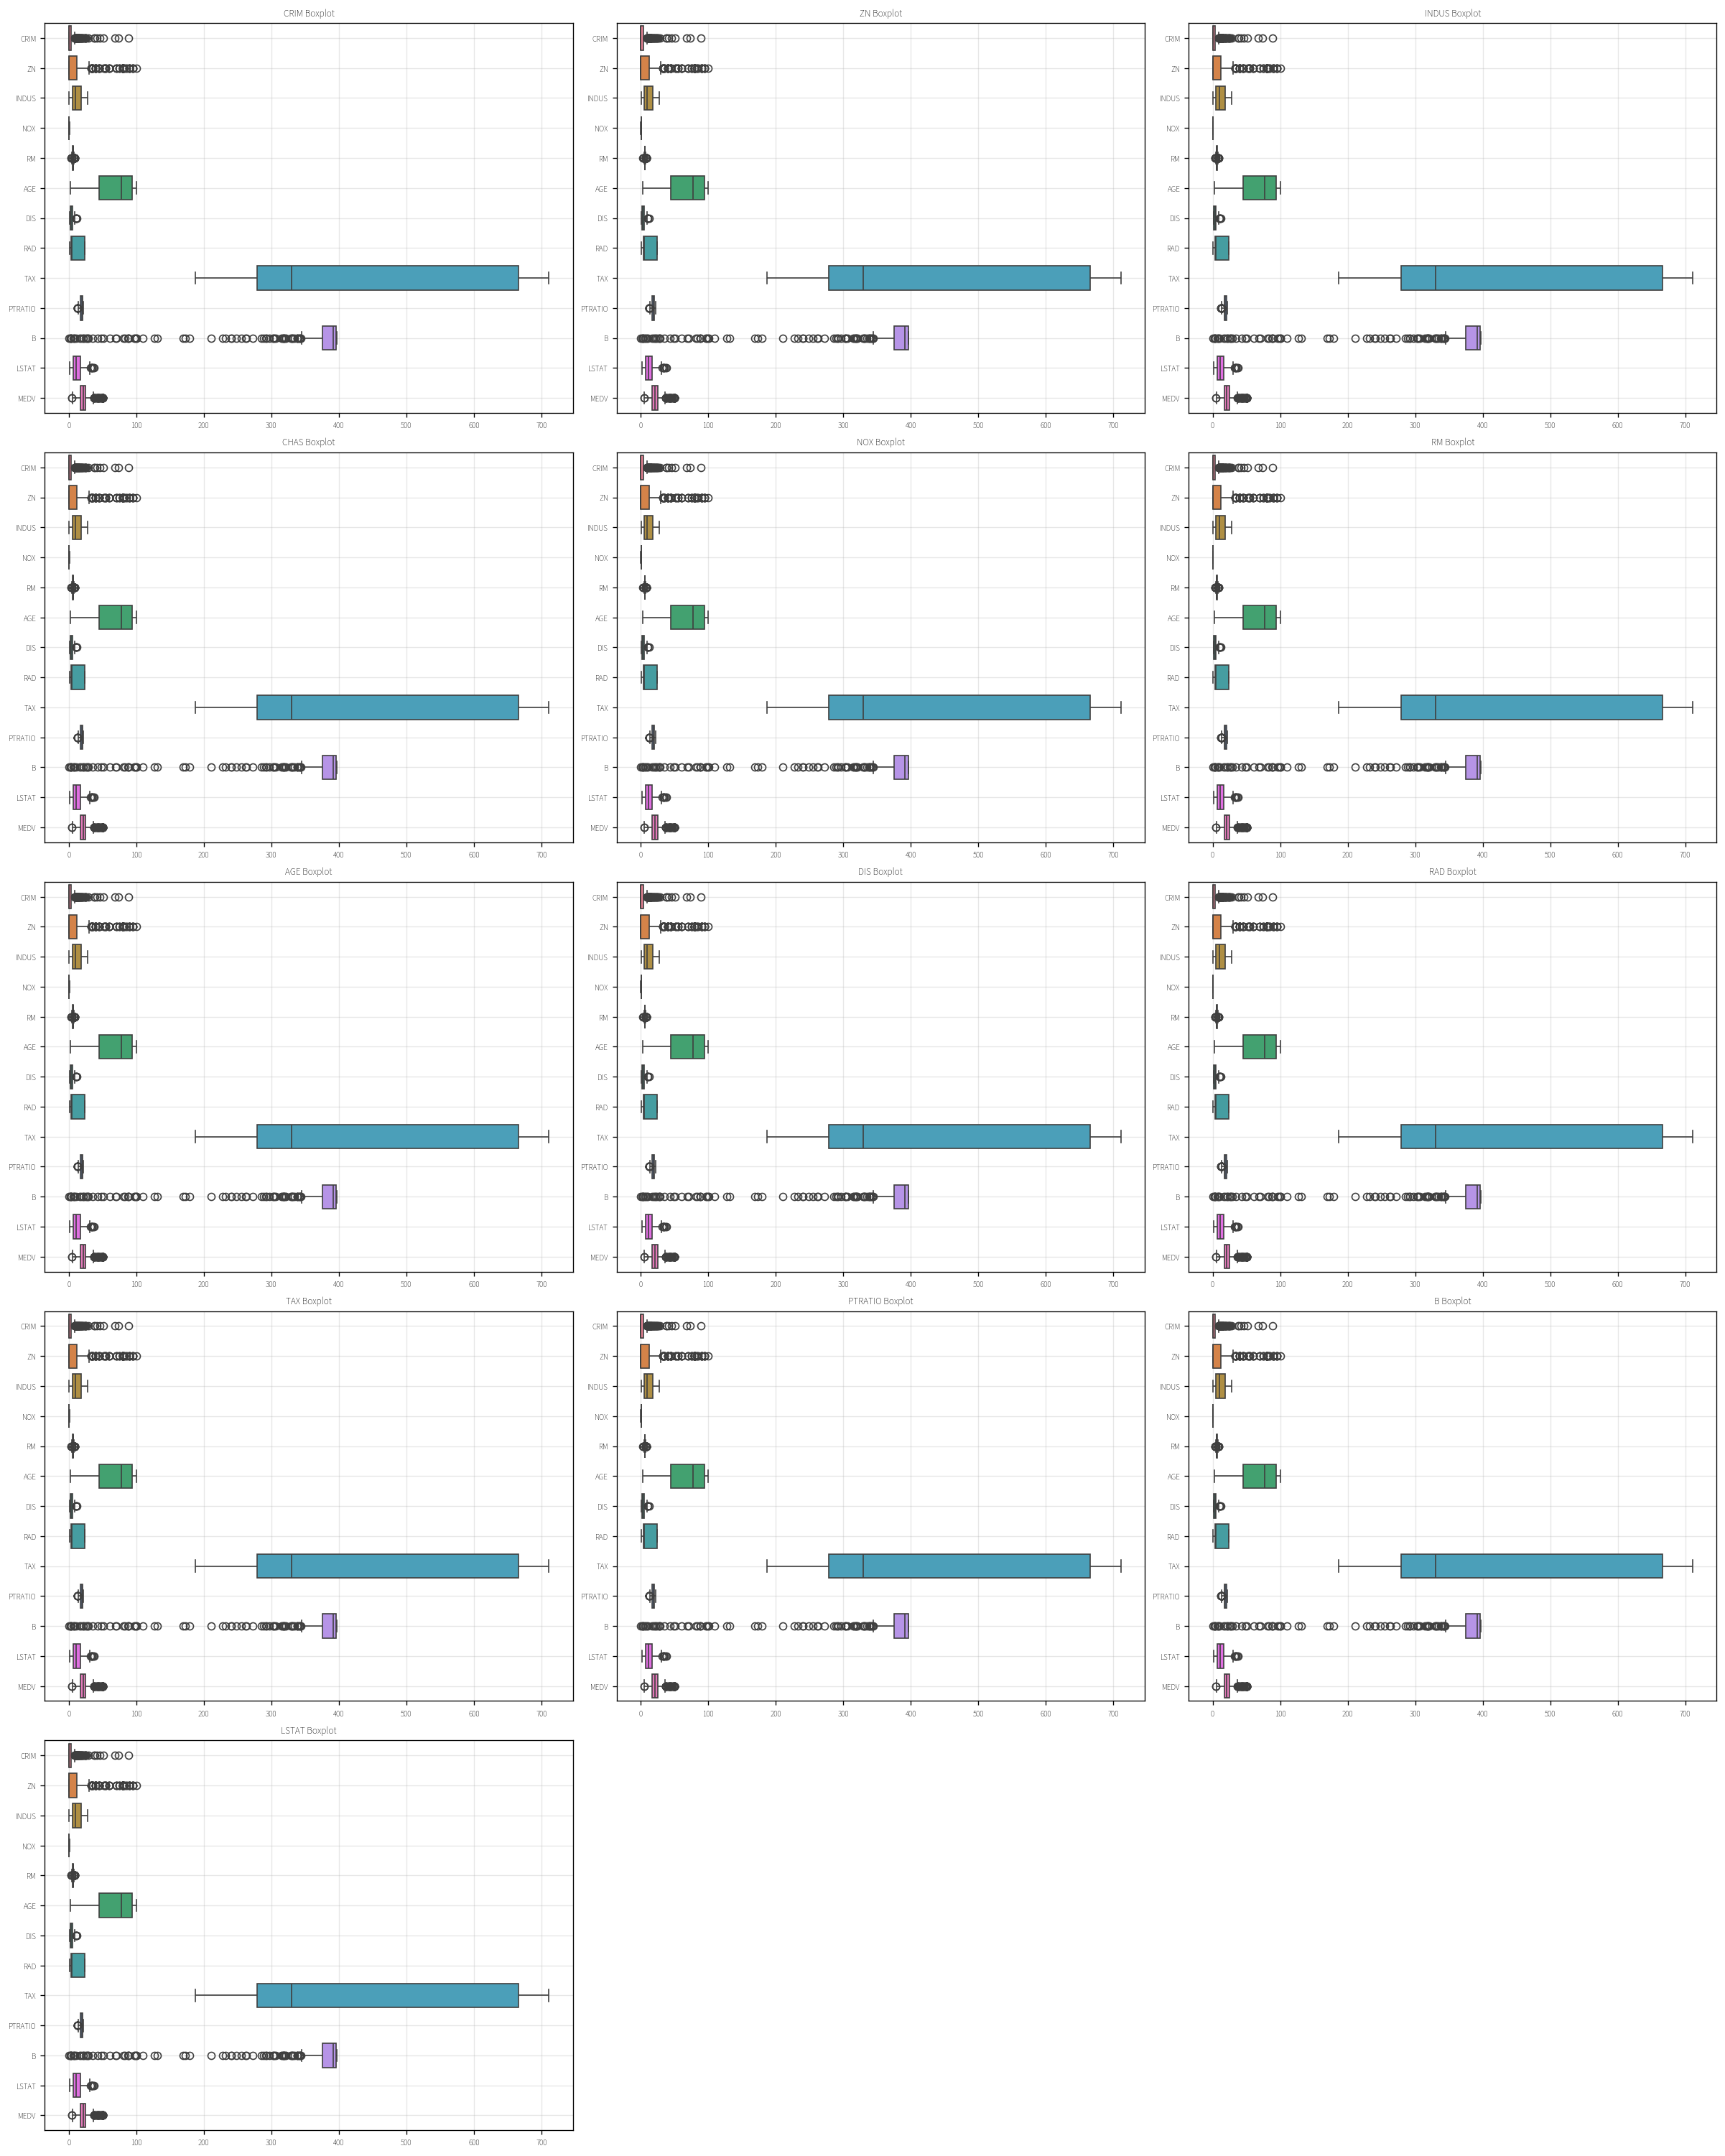

In [76]:
# 2-3
width_px = 2000
height_px = 1000
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

features = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

plt.figure(figsize=(20,25))


# 그래프 그리기->seaborn 사용
for i, cols in enumerate(features):
        plt.subplot(5,3, i+1)
        sb.boxplot(data=boston, orient='h')
        plt.title(f"{cols} Boxplot")
        plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


TypeError: Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one


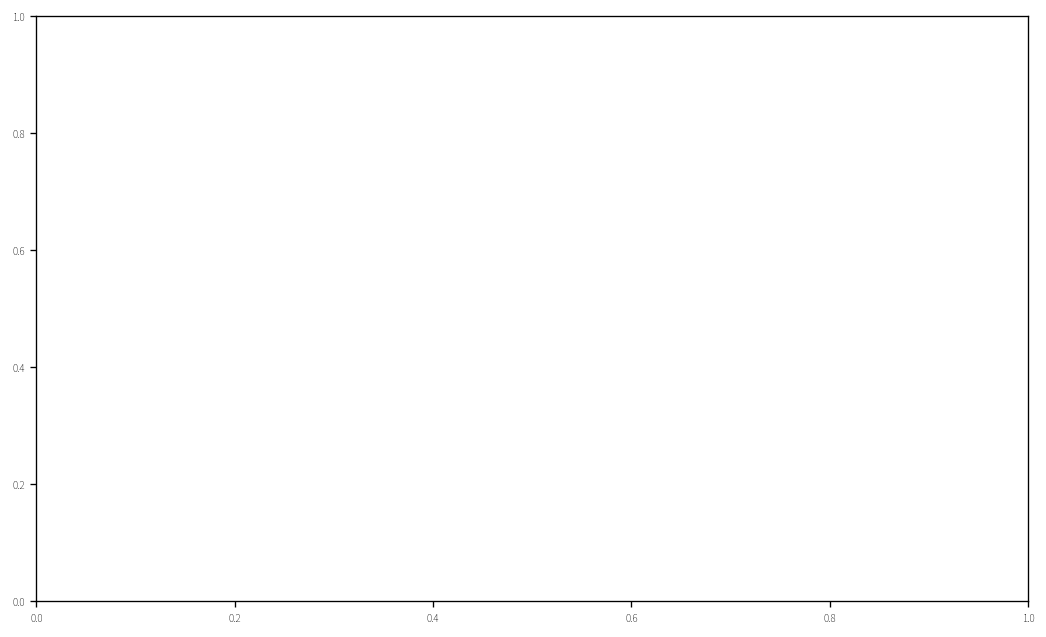

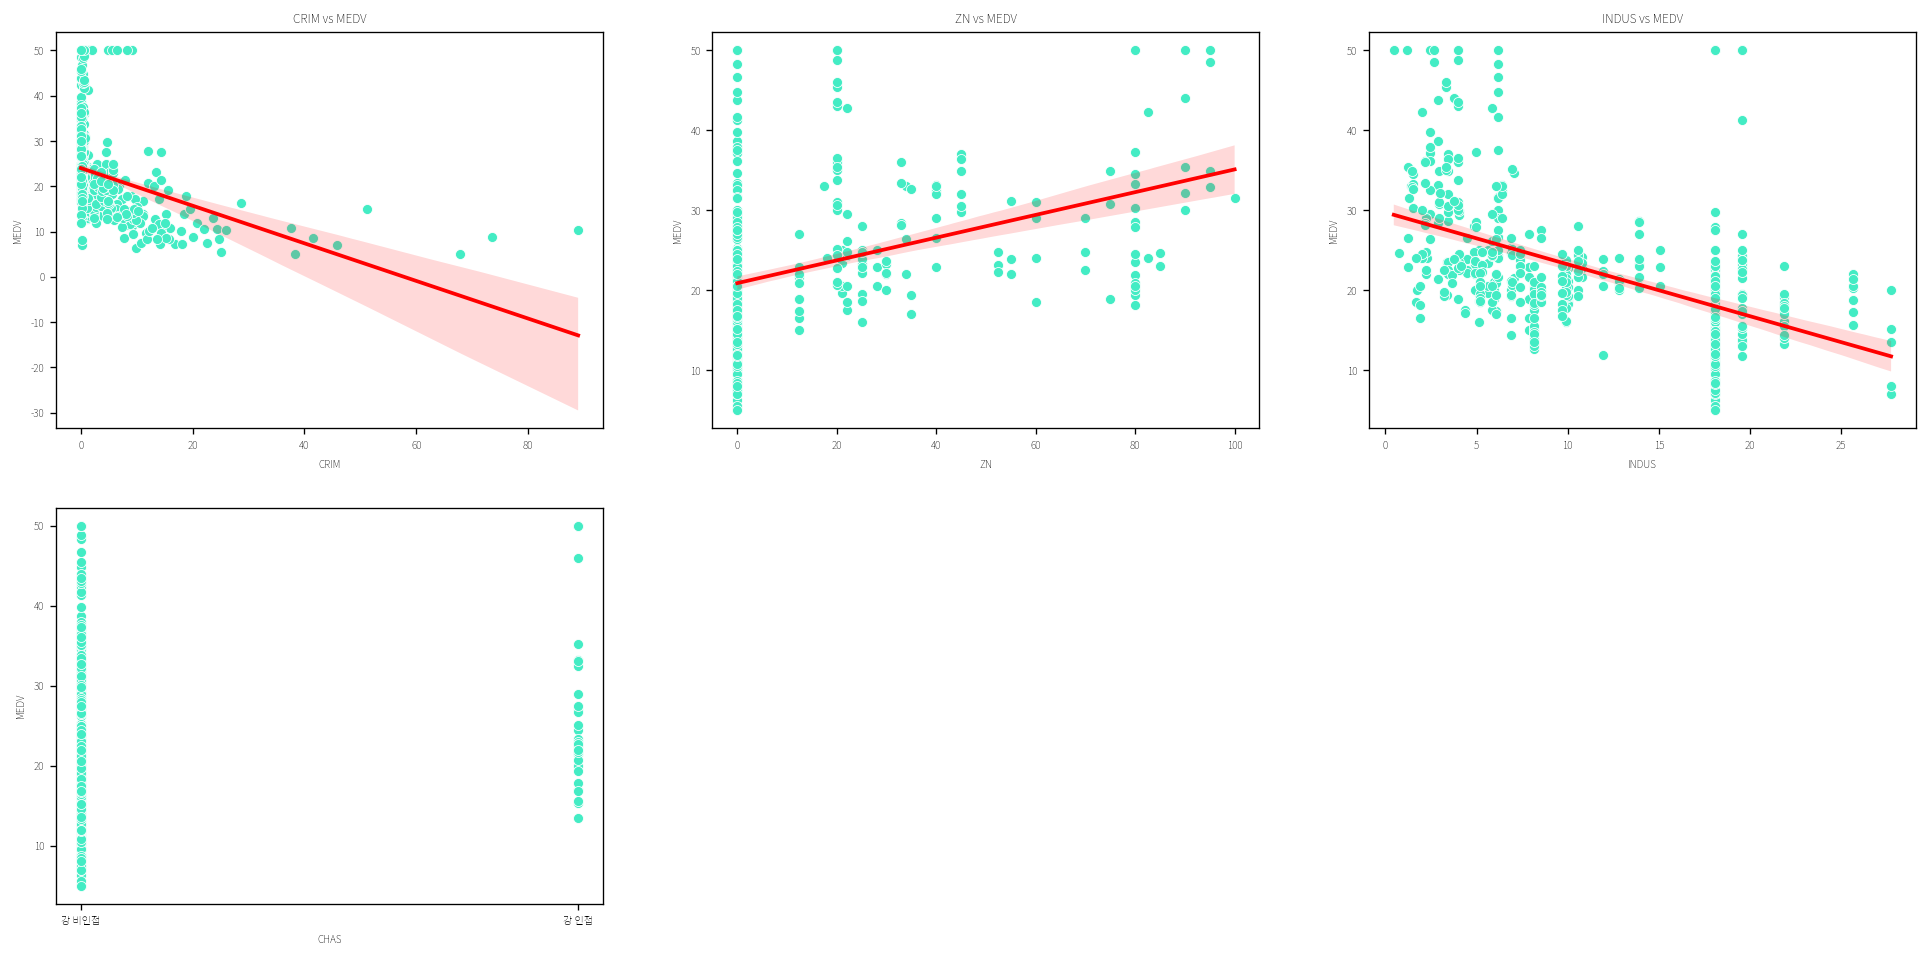

In [77]:
# 1.

width_px = 1280
height_px = 760
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

features = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

plt.figure(figsize=(20,30))

for i, col in enumerate(features):
    plt.subplot(6,3, i+1)
    sb.scatterplot(data=boston, x=col, y ='MEDV', color="#43ECC4")
    sb.regplot(data=boston, x=col,y='MEDV', scatter=False, color='red')
    plt.title(f"{col} vs MEDV")
# 그래프 그리기->seaborn 사용



plt.show()
plt.close()

📝Mission 4:범주형 변수 분석

In [ ]:
#4-1 
boston['CHAS'].value_counts(normalize=True) * 100

CHAS
강 비인접    93.083004
강 인접      6.916996
Name: proportion, dtype: float64

C:\Users\itwill\AppData\Local\Temp\ipykernel_26552\3215292995.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=boston, x='CHAS', palette = 'Reds')


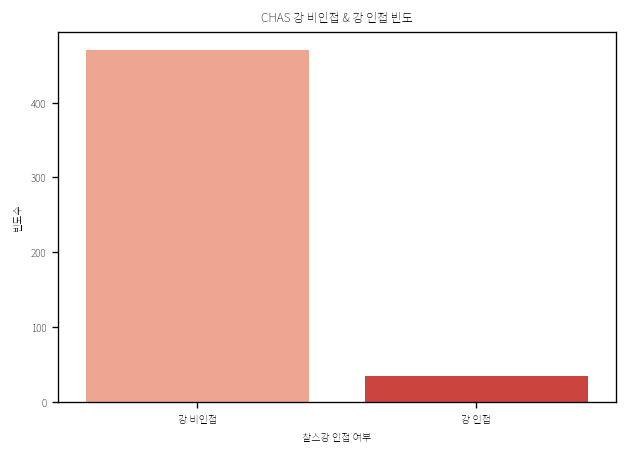

In [ ]:
# 4-1
plt.figure(figsize=(6,4))
sb.countplot(data=boston, x='CHAS', palette = 'Reds')
plt.title("CHAS 강 비인접 & 강 인접 빈도")
plt.xlabel("찰스강 인접 여부")
plt.ylabel("빈도수")
plt.show()

In [ ]:
# 4-2
CHAS_stats = boston.groupby('CHAS')['MEDV'].describe()
CHAS_stats

C:\Users\itwill\AppData\Local\Temp\ipykernel_26552\4008299847.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  CHAS_stats = boston.groupby('CHAS')['MEDV'].describe()


,count,mean,std,min,25%,50%,75%,max
CHAS,,,,,,,,
강 비인접,471.0,22.093843,8.831362,5.0,16.6,20.9,24.80,50.0
강 인접,35.0,28.440000,11.816643,13.4,21.1,23.3,33.15,50.0


📝Mission5:종합 분석 보고서 작성

In [ ]:
# 5-1
import pandas as pd
missing_count = boston.isna().sum()

missing_ratio = (boston.isna().sum() / len(boston)) *100

missing_ratio_total = (boston.isna().sum().sum()/boston.shape[0] * boston.shape[1]) * 100

missing_report = pd.DataFrame({

    "Missing Count" : missing_count,
    "Missing_ratio(%)" : missing_ratio
})

print(missing_report)

print(f"Boston 데이터의 모든 변수에서는 결측값 비율이 (Missing Ratio = {missing_ratio_total:.1f}%)로 결측값이 발견되지 않음.")



         Missing Count  Missing_ratio(%)
CRIM                 0               0.0
ZN                   0               0.0
INDUS                0               0.0
CHAS                 0               0.0
NOX                  0               0.0
RM                   0               0.0
AGE                  0               0.0
DIS                  0               0.0
RAD                  0               0.0
TAX                  0               0.0
PTRATIO              0               0.0
B                    0               0.0
LSTAT                0               0.0
MEDV                 0               0.0
Boston 데이터의 모든 변수에서는 결측값 비율이 (Missing Ratio = 0.0%)로 결측값이 발견되지 않음.


In [ ]:
# CHAS강 인접여부와 비인접 여부에 따른 저소득층 비율
boston.groupby('CHAS')['LSTAT'].describe()

C:\Users\itwill\AppData\Local\Temp\ipykernel_26552\1452420304.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  boston.groupby('CHAS')['LSTAT'].describe()


,count,mean,std,min,25%,50%,75%,max
CHAS,,,,,,,,
강 비인접,471.0,12.757941,7.169271,1.73,7.160,11.38,17.095,37.97
강 인접,35.0,11.241714,6.686651,1.92,5.395,10.50,15.070,26.82


C:\Users\itwill\AppData\Local\Temp\ipykernel_26552\2491906219.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=boston, x='CHAS', y='LSTAT', palette='Set2')


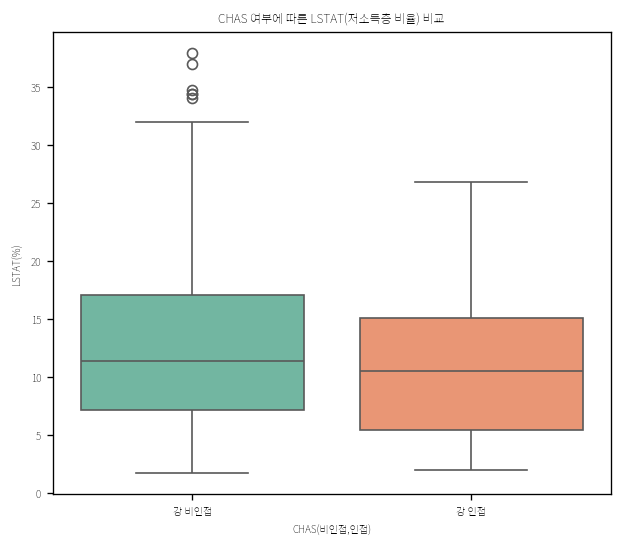

In [ ]:
# CHAS강 인접여부와 비인접 여부에 따른 저소득층 비율
plt.figure(figsize=(6,5))
sb.boxplot(data=boston, x='CHAS', y='LSTAT', palette='Set2')
plt.title("CHAS 여부에 따른 LSTAT(저소득층 비율) 비교")
plt.xlabel("CHAS(비인접,인접)")
plt.ylabel("LSTAT(%)")
plt.show()

In [ ]:
# 타운별 1인당 범죄율에 따른 주택 가격 중앙값
boston.groupby('CRIM')['MEDV'].describe()

,count,mean,std,min,25%,50%,75%,max
CRIM,,,,,,,,
0.00632,1.0,24.0,NaN,24.0,24.0,24.0,24.0,24.0
0.00906,1.0,32.2,NaN,32.2,32.2,32.2,32.2,32.2
0.01096,1.0,22.0,NaN,22.0,22.0,22.0,22.0,22.0
0.01301,1.0,32.7,NaN,32.7,32.7,32.7,32.7,32.7
0.01311,1.0,35.4,NaN,35.4,35.4,35.4,35.4,35.4
...,...,...,...,...,...,...,...,...
45.74610,1.0,7.0,NaN,7.0,7.0,7.0,7.0,7.0
51.13580,1.0,15.0,NaN,15.0,15.0,15.0,15.0,15.0
67.92080,1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0


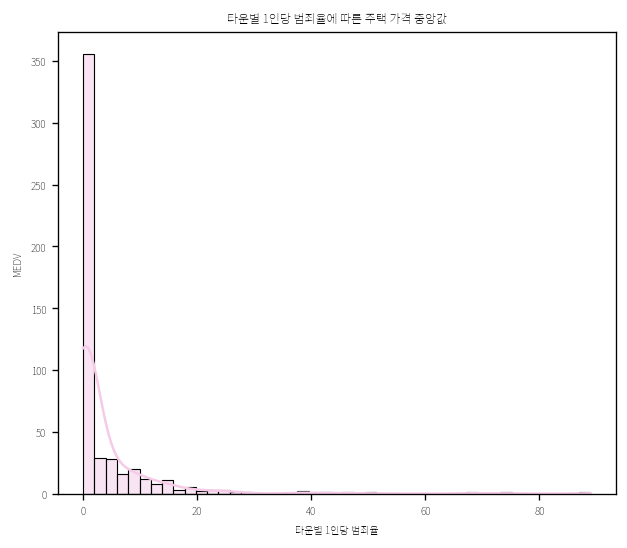

In [ ]:
plt.figure(figsize=(6,5))
sb.histplot(boston['CRIM'],kde = True, color="#F5CBE8")
plt.title("타운별 1인당 범죄율에 따른 주택 가격 중앙값")
plt.xlabel("타운별 1인당 범죄율")
plt.ylabel("MEDV")
plt.show()

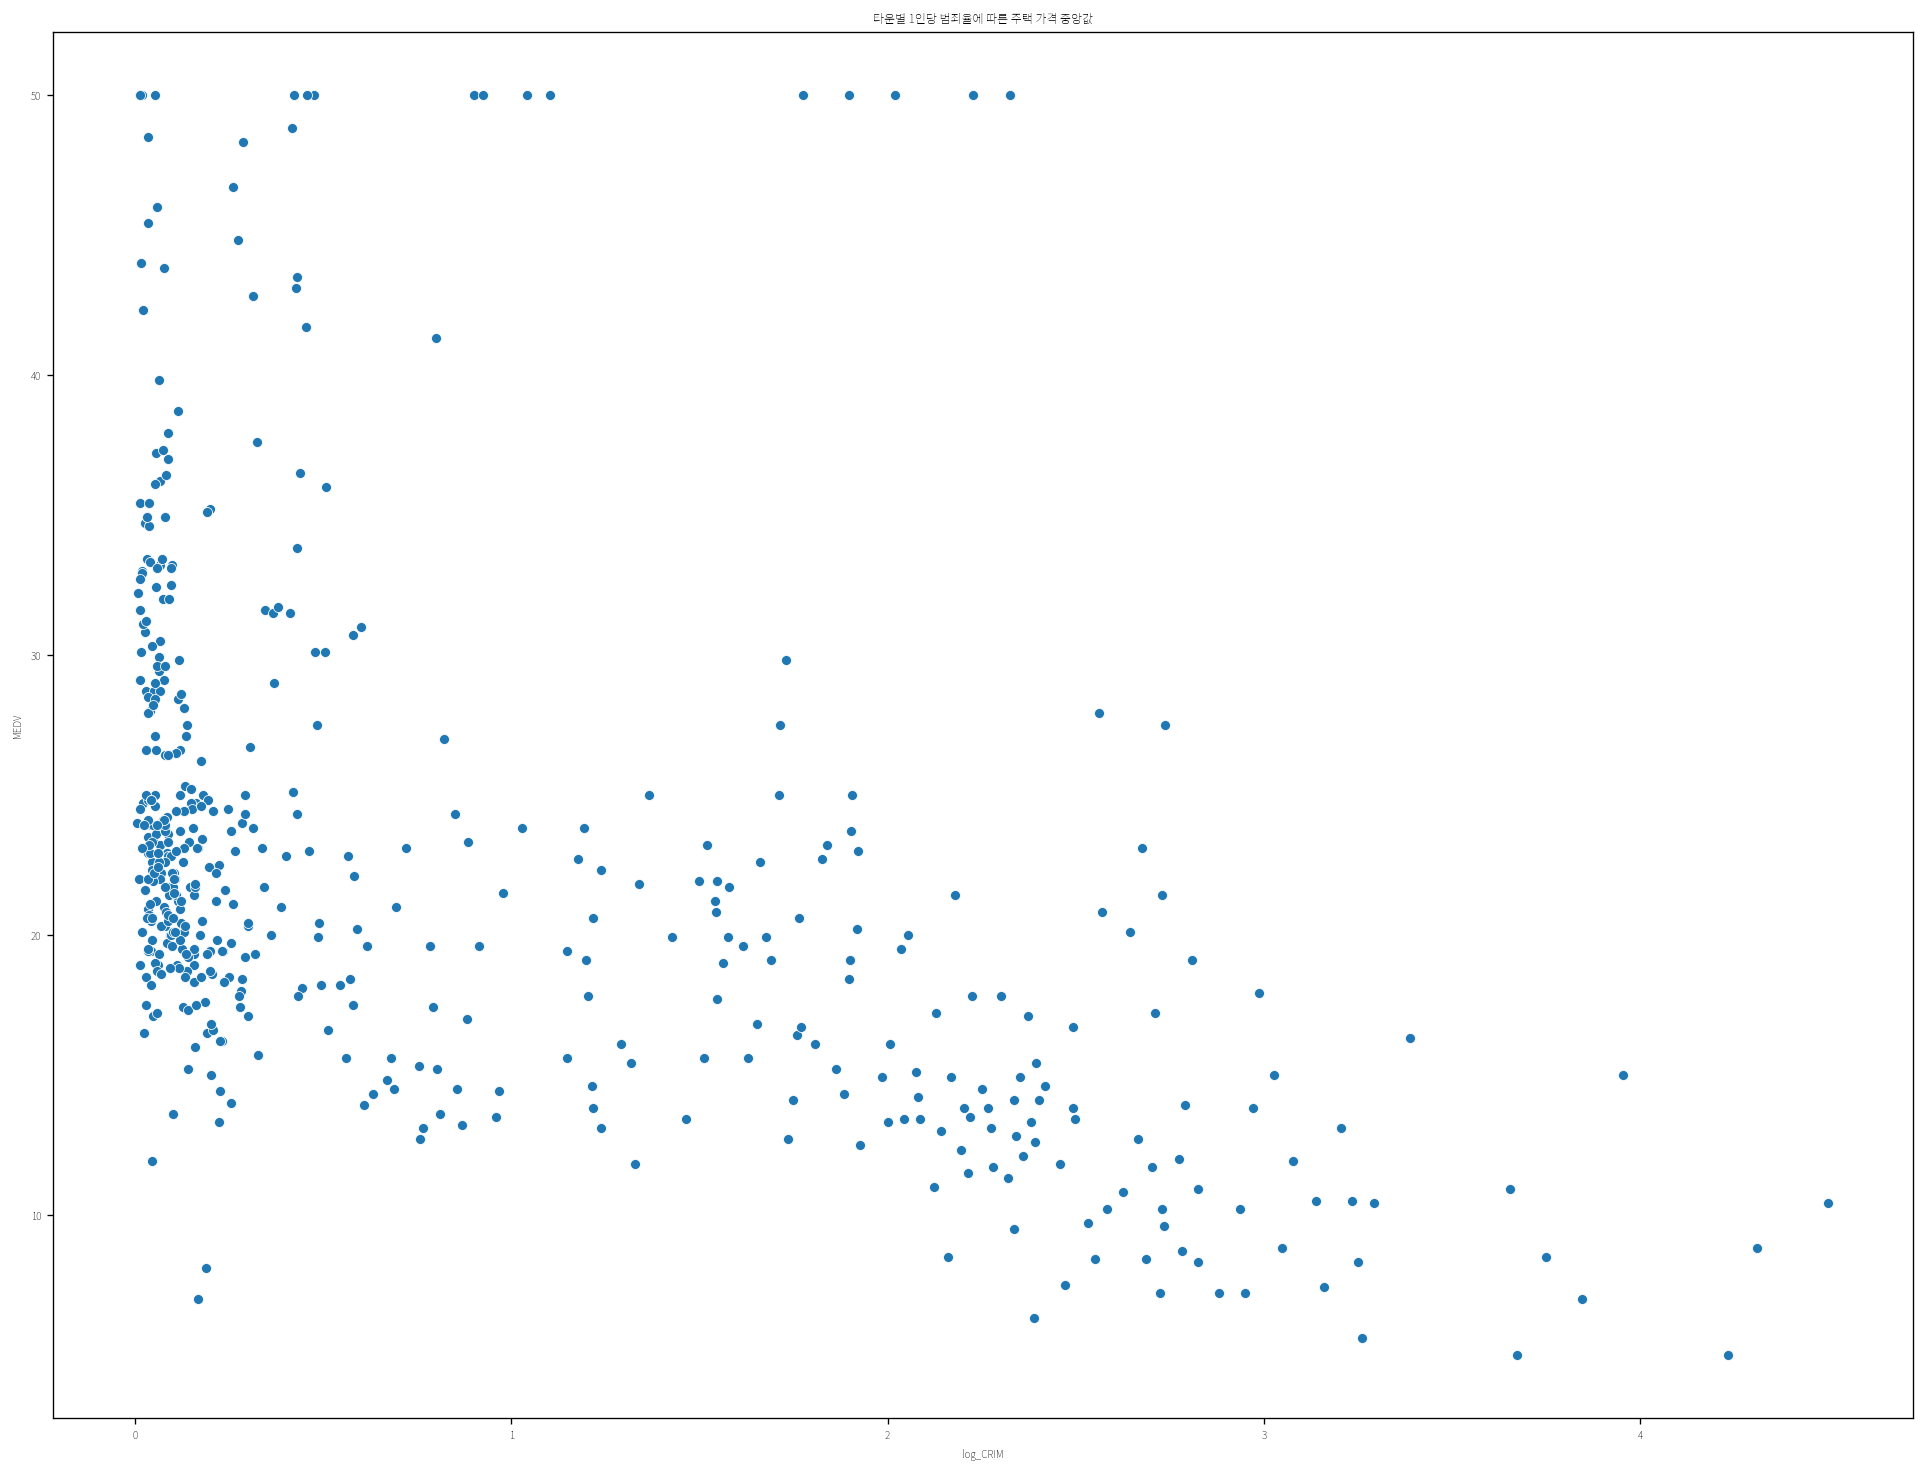

In [ ]:
boston['log_CRIM'] = np.log1p(boston['CRIM'])

sb.scatterplot(data=boston, x='log_CRIM', y='MEDV')
plt.title("타운별 1인당 범죄율에 따른 주택 가격 중앙값")
plt.show()

# 5-2
1.ZN의 크기가 0인 값들의 빈도수가 가장 높습니다. 따라서, 대규모 주거용 토지가 거의 없는 것으로 나타난 도시밀집지역임을 파악할 수 있습니다.

2.CHAS에서 '강 비인접' 지역에서 이상치가 발견되었고 또한 전체적으로 LSTAT 값이 강 인접 지역에 비해 더욱 퍼져 있습니다.
따라서, 강 비인접지역일수록 저소득층 비율이 높은 것으로 나타났고
반면에, 강 인접지역은 강 비인접 지역에 비해 비율이 상대적으로 낮으며 다양성도 낮은 것으로 나타났습니다.
이를 통해 알 수 있는 점은, 강 인접 지역이 강 비인접 지역에 다양성이 낮으며 상대적으로 높은 소득층의 비율이 몰려있다는 사실을 파악할 수 있습니다.

3.CRIM과 MEDV의 관계를 선그래프를 통해 조사했을 때 알 수 점은 범죄율이 0인 지역의 주택 집값은 높은 것으로 나왔습니다. 또한, 범죄율이 낮을수록 주택값이 
하락한다는 사실도 알 수 있었습니다.